- Idée "Quoi dans mon assiette pour une nutrition saine sans additifs": Scanner n'importe quel produit et obtenir un indicateur sur la qualité nutritionelle du produit en se basant sur le nombre d'additifs, nommé additiscore.
- Informations sur le Nutri-Score : Le Nutri-Score, aussi appelé système 5 couleurs, est un système d'étiquetage nutritionnel basé sur un logo avec cinq valeurs allant de A à E et du vert au rouge, établi en fonction de la valeur nutritionnelle d'un produit alimentaire. Il est mis en place par le gouvernement Français en 2016 dans le cadre de la loi de modernisation du système de santé. Le score est calculé par un système de points, le score le plus faible étant le meilleur :

- Eléments défavorables au score :

apport calorique teneur en sucre teneur en graisses saturés teneur en sel

- Eléments favorables au score :

teneur en fruits, légumes, légumineuses et oléagineux teneur en fibres teneur en protéines Des points sont attribués en fonction des éléments favorables et défavorables et un grade est attribué à chaque produit en fonction de son score :

- Pour les aliments :

A : <0

B : 0 à 2

C : 3 à 10

D : 11 à 18

E : 19 à 40

- Pour les boissons :

A : Eau

B : <2

C : 2 à 5

D : 6 à 9

E : 10 à 40

# Import des librairies et chargement des données

In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Lecture des données

In [68]:
pd.options.display.max_columns = 162
pd.options.display.max_rows = 162

In [69]:
data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep = '\t', low_memory=False)

In [70]:
data.shape

(320772, 162)

In [71]:
data.dtypes


code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

In [72]:
data.sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
94442,0077890335246,http://world-fr.openfoodfacts.org/produit/0077...,usda-ndb-import,1489133861,2017-03-10T08:17:41Z,1489133861,2017-03-10T08:17:41Z,Garlic Bread,NaN,NaN,NaN,NaN,Wegmans,wegmans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bread: whole wheat flour, water, enriched flou...",NaN,NaN,NaN,NaN,NaN,57 g (0.2 LOAF),NaN,3.0,[ bread -> en:bread ] [ whole-wheat-flour -...,"en:e375,en:e101,en:e300","E375 - Acide nicotinique,E101 - Riboflavine,E3...",0.0,NaN,NaN,0.0,NaN,NaN,NaN,c,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1393.0,NaN,14.04,3.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,47.37,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,10.53,NaN,NaN,NaN,1.02616,0.404000,NaN,0.000158,NaN,NaN,NaN,NaN,0.0000,0.395,0.178947,0.003509,NaN,NaN,0.00007,NaN,NaN,NaN,NaN,NaN,0.211,NaN,0.000,NaN,0.00316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN
308894,8422915003983,http://world-fr.openfoodfacts.org/produit/8422...,javichu,1386627174,2013-12-09T22:12:54Z,1475770471,2016-10-06T16:14:31Z,Cacahuetes con cáscara tostados sin sal,Cacahuetes con cáscara tostados 

In [73]:
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

Il y a 162 colonnes qui renseignent notamment le nom du produit, les pays de distribution, et la composition nutritionnelle

In [74]:
data.describe(include='all')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,320749,320749,320770,320769,320763,320772,320772,303010,52795,104819,78960,78961,292360,292352,84410,84389,84411,22190,22153,36501,36495,46559,46644,46666,29306,29303,18803,23,20320,58193,51722,320492,320492,320492,248962,28344,19,24353,24329,24352,211331,0.0,248939.000000,248905,154680,154680,248939.000000,0.0,4835,248939.000000,0.0,11696,0.0,221210,91513,94491,320726,320726,320726,84366,84366,75836,75836,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268

# Sélection des produits vendus en France

In [75]:
data['countries_fr'].value_counts()

États-Unis                                      172998
France                                           94392
Suisse                                           14953
Allemagne                                         7870
Espagne                                           5009
                                                 ...  
Danemark,Suisse,en:Deutschland,en:Frankreich         1
France,Luxembourg,Suisse                             1
Autriche,République tchèque,Allemagne                1
Allemagne,Hongrie                                    1
Chine,Hong Kong                                      1
Name: countries_fr, Length: 722, dtype: int64

In [76]:
mask = data['countries_fr'].str.contains('France', na=False)
df = data[mask].drop(['countries', 'countries_tags', 'countries_fr'], axis=1)
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutr

# Les valeurs manquantes

In [77]:
def test_completion(data):
    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = []
        var_dict[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux de complétion", "Nombre de valeurs manquantes"]).sort_values(by="Taux de complétion", ascending=False)

In [78]:
pd.set_option('display.max_rows', 500)
test_completion(df)

,Taux de complétion,Nombre de valeurs manquantes
code,100.00,0
states_tags,100.00,0
creator,100.00,0
created_t,100.00,0
created_datetime,100.00,1
last_modified_t,100.00,0
last_modified_datetime,100.00,0
url,100.00,0
states_fr,100.00,0
states,100.00,0


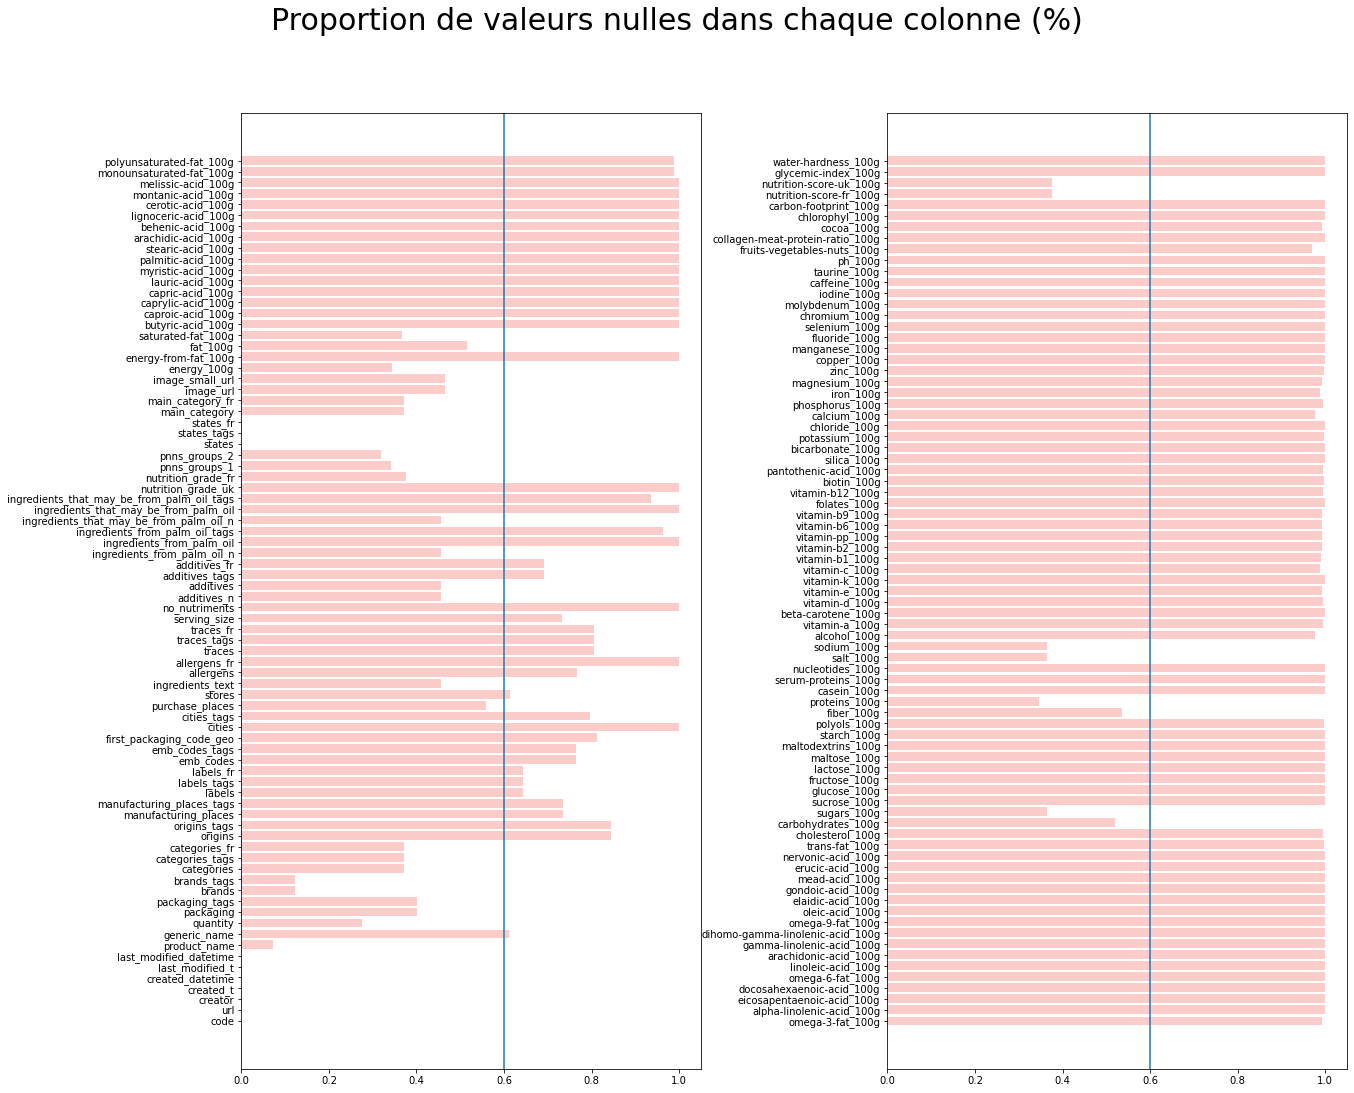

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 16))
fig.suptitle("Proportion de valeurs nulles dans chaque colonne (%)", size=30)

count = df.isnull().mean(axis=0)
ax1.barh(y=count[:80].index, width=count[:80].values, color='#FB9A99', alpha=0.5)
ax1.axvline(x=0.6)
ax2.barh(y=count[80:].index, width=count[80:].values, color='#FB9A99', alpha=0.5)
ax2.axvline(x=0.6)

plt.tight_layout(w_pad=0,pad=5)
plt.show()

Beaucoup de colonnes ont un nombre important de valeurs manquantes. Ces colonnes n'apportant alors pas beaucoup d'informations, nous allons supprimer toutes celles qui ont plus de 60% de valeurs manquantes.

<AxesSubplot:>

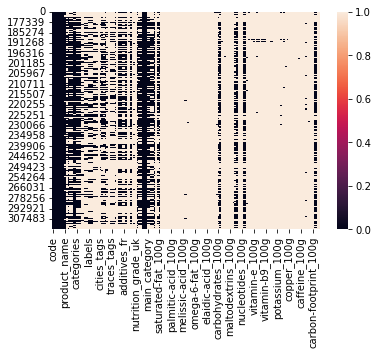

In [80]:
sns.heatmap(df.isnull())

# Suppression des colonnes avec plus de 60% de valeurs manquantes


In [81]:
threshold = 0.4 * df.shape[0]

df2 = df.dropna(axis=1, thresh=threshold)

In [82]:
print(df2.columns)
df2.shape

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'purchase_places',
       'ingredients_text', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')


(98440, 43)

# Suppression des colonnes sans intérêt pour l'analyse

In [83]:
df3 = df2.drop(['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime',
                'quantity', 'packaging', 'packaging_tags', 'purchase_places','brands', 'brands_tags', 'additives', 
                'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'states', 
                'states_tags', 'states_fr', 'image_url', 'image_small_url','ingredients_text'], axis=1)
df3.shape

(98440, 22)

# Traitement des colonnes semblables


## Catégorie d'un produit

Il s'agit des colonnes: 'categories', 'categories_tags', 'categories_fr', 'pnns_groups_1', 'pnns_groups_2', 'main_category' et 'main_category_fr'

In [84]:
col_sem = df3[['categories', 'categories_tags', 'categories_fr', 
                 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr']]

In [85]:
print("Nombre de catégories différentes:")
for col in col_sem :
    print(f"{col} : {len(col_sem[col].value_counts())}")

Nombre de catégories différentes:
categories : 26653
categories_tags : 15640
categories_fr : 15640
pnns_groups_1 : 13
pnns_groups_2 : 41
main_category : 1615
main_category_fr : 1615


'pnns_groups_1' semble être le meilleur choix avec un nombre de catégories plus réduit, ce qui permettra éventuellement de faire des analyses dessus.

In [86]:
df3['pnns_groups_1'].value_counts()

unknown                    12498
Sugary snacks               9407
Fish Meat Eggs              6768
Beverages                   6597
Milk and dairy products     6421
Cereals and potatoes        6128
Composite foods             6046
Fruits and vegetables       4077
Fat and sauces              3794
Salty snacks                2122
fruits-and-vegetables        549
sugary-snacks                472
cereals-and-potatoes           2
Name: pnns_groups_1, dtype: int64

In [87]:
df4 = df3.drop(['categories', 'categories_tags', 'categories_fr', 
                'pnns_groups_2', 'main_category', 'main_category_fr'], axis=1)
df3.shape

(98440, 22)

## Entre le sel et le soduim

Normalement il s'agit de la même chose, en effet le sel est du chlorure de sodium, donc 1g de sodium correspond à environ 2,54g de sel.

Corrélation entre 'salt_100g' et 'sodium_100g': 0.9999999685626424


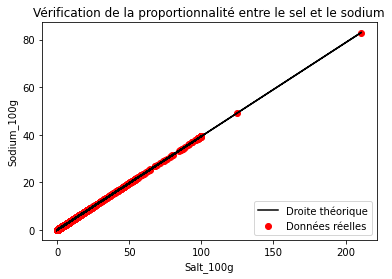

In [88]:
print(f"Corrélation entre 'salt_100g' et 'sodium_100g': {df4['salt_100g'].corr(df4['sodium_100g'])}")

plt.title('Vérification de la proportionnalité entre le sel et le sodium')
plt.scatter(df4['salt_100g'], df4['sodium_100g'], color='red', label='Données réelles')
plt.plot(df4['salt_100g'], df4['salt_100g'] / 2.54, color='black', label='Droite théorique')
plt.xlabel('Salt_100g')
plt.ylabel('Sodium_100g')
plt.legend(loc='lower right')
plt.show()

In [89]:
df5 = df4.drop(['salt_100g'], axis=1)
df5.shape

(98440, 15)

## Entre les scores nutritionnels FR et UK

Il existe deux colonnes: 'nutrition-score-fr_100g' et 'nutrition-score-uk_100g' qui sont très proches mais utilisent un barème un peu différent.

Le score nutritionnel français étant plus adapté au marché français, nous conserverons celui-là.

In [90]:
df6 = df5.drop(['nutrition-score-uk_100g'], axis=1)
df6.shape

(98440, 14)

# Conversion de la valeur énergétique en calories

In [91]:
#Conversion de la valeur énergétique en calories
df6['energy_100g'] = df6['energy_100g'] / 4.184

# Traitement des valeurs manquantes

In [92]:
#ficher le nombre de valeurs manquantes par colonne
df6.apply(lambda x: sum(x.isnull()), axis=0)

code                           0
product_name                7193
additives_n                44974
nutrition_grade_fr         37025
pnns_groups_1              33559
energy_100g                33847
fat_100g                   50798
saturated-fat_100g         36065
carbohydrates_100g         51229
sugars_100g                35925
fiber_100g                 52717
proteins_100g              34122
sodium_100g                35869
nutrition-score-fr_100g    37025
dtype: int64

In [93]:
df7 = df6.dropna(subset=['product_name', 'energy_100g', 'nutrition-score-fr_100g'])
df7.shape

(60992, 14)

In [94]:
# Afficher le nombre de valeurs manquantes par colonne
df7.apply(lambda x: sum(x.isnull()), axis=0)

code                           0
product_name                   0
additives_n                20133
nutrition_grade_fr             0
pnns_groups_1              14168
energy_100g                    0
fat_100g                   17109
saturated-fat_100g             0
carbohydrates_100g         17161
sugars_100g                    0
fiber_100g                 16414
proteins_100g                  0
sodium_100g                    0
nutrition-score-fr_100g        0
dtype: int64

In [95]:
# Remplacement des valeurs restantes
df8 = df7.fillna(np.NaN)
df8.shape

(60992, 14)

# Traitement des valeurs aberrantes (outliers)

In [96]:
df8.describe(include='all')

,code,product_name,additives_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
count,60992,60992,40859.000000,60992,46824,60992.000000,43883.000000,60992.000000,43831.000000,60992.000000,44578.000000,60992.000000,60992.000000,60992.000000
unique,60992,51066,NaN,5,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0000000036252,Mayonnaise,NaN,d,Sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,43,NaN,16907,7362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.051984,NaN,NaN,282.173547,13.334119,5.439707,27.787834,13.389663,2.542348,7.748720,0.426237,8.690107
std,NaN,NaN,2.614913,NaN,NaN,3156.082346,16.767690,8.561807,27.275458,19.020091,4.621375,7.845984,1.502264,9.044649
min,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000
25%,NaN,NaN,0.000000,NaN,NaN,103.967495,1.400000,0.300000,4.100000,1.000000,0.000000,1.900000,0.031496,1.000000
50%,NaN,NaN,1.000000,NaN,NaN,248.804971,7.000000,2.000000,14.800000,4.000000,1.300000,6.000000,0.217000,9.000000
75%,NaN,NaN,3.000000,NaN,NaN,396.749522,21.000000,7.400000,53.000000,17.870000,3.200000,10.900000,0.484252,15.000000


Suppression si energy_100g > 900 calories 
car les lipides sont les nutriments les plus denses et 100g de lipides = 900 calories

In [97]:
df9 = df8.drop(df8[df8.energy_100g > 900].index)

In [98]:
# Suppression si valeurs nutritionnelles (pour 100g) > 100g ou < 0g
for col in df9.columns[15:-2]:
    df9.drop(df9[(df9[col] > 100) | (df9[col] < 0)].index, inplace=True)

In [99]:
# Suppresion si somme des glucides + lipides + protéines + sel pour 100g > 100g (à 10% près)
df9['temp'] = (df9[['fat_100g', 'saturated-fat_100g','sodium_100g']].fillna(0).max(axis=1) 
               + df9[['carbohydrates_100g', 'sugars_100g']].fillna(0).max(axis=1)
               + df9['proteins_100g'].fillna(0) 
               + df9['fiber_100g'].fillna(0) )
df9.drop(df9[df9['temp'] > 110].index, inplace=True)


In [100]:
# Suppression si calories < lipides*9 + (glucides+proteines)*4 + fibres*1.9 (à 10% près)
df9['temp'] = (9*df9['fat_100g'].fillna(0)
               + 4*(df9['carbohydrates_100g'].fillna(0) + df9['proteins_100g'].fillna(0)) 
               + 1.9*df9['fiber_100g'].fillna(0))
df9.drop(df9[df9['temp'] > 1.1 * df9['energy_100g']].index, inplace=True)

# Suppression si calories > lipides*9 + (glucides+proteines)*4 + fibres*1.9 (à 10% près)
# SI toutes les infos sur les nutriments sont dispos
mask = (~(df9['fat_100g'].isnull() 
          | df9['carbohydrates_100g'].isnull() 
          | df9['fiber_100g'].isnull()) 
        & (df9['energy_100g'] > 1.1 * df9['temp']))
df9.drop(df9[mask].index, inplace=True) 
df9.drop(['temp'], axis=1, inplace=True)

df9.shape

(58736, 14)

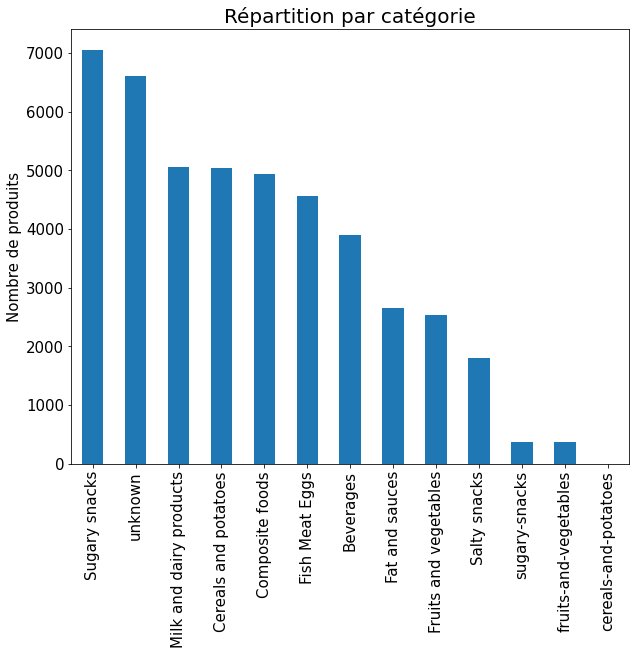

In [101]:
fig, ax = plt.subplots(figsize=(10, 8))

df9['pnns_groups_1'].value_counts().plot(kind='bar')
ax.set_title('Répartition par catégorie', size=20)
ax.tick_params(labelsize=15)
ax.set_ylabel('Nombre de produits', size=15)
plt.show()

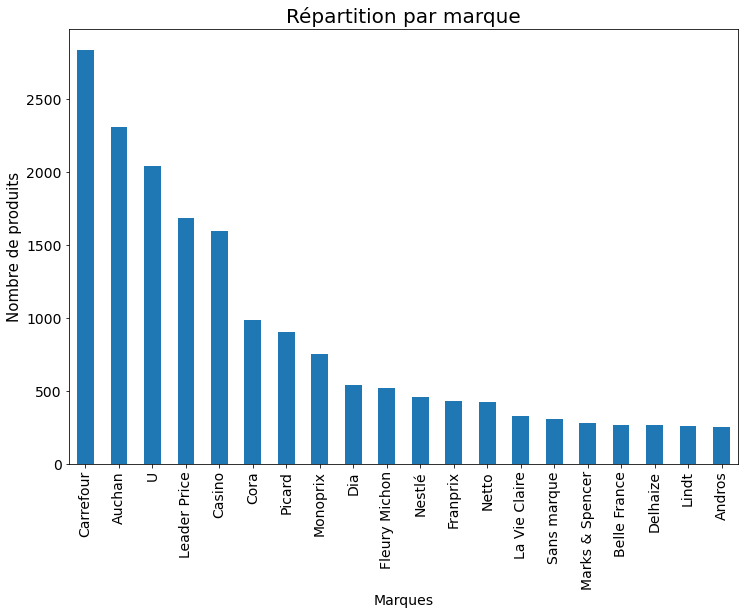

In [102]:
fig, ax = plt.subplots(figsize=(12, 8)
                      )
df2['brands'].value_counts().head(20).plot(kind='bar')
ax.set_title("Répartition par marque", size=20)
ax.tick_params(labelsize=14)
ax.set_xlabel("Marques", size=14)
ax.set_ylabel('Nombre de produits', size=15)

plt.show()

<AxesSubplot:>

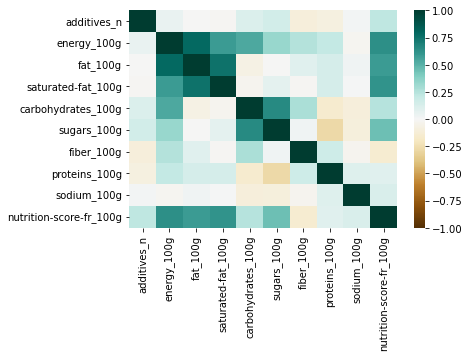

In [103]:
sns.heatmap(df9.corr(), vmin=-1, vmax=1, cmap='BrBG')

# Filtrage sur le taux de complétion des varaibles


Afin de faire un premier tri nous allons filtrer les observations sur le fait que des valeurs sont présentes sur un ensemble de variables que nous pensons permettre de caractériser les produits:

Product name: le nom du produit brands: une liste de marques associées au produit ppns_groups_1: groupes et sous-groupes d'aliments définis par l'Afssa (Agence Française de sécurité sanitaire des aliments) en 2001 et mis à jours par l'Anses en 2016. nutriscore_grade_fr : indicateur de nutriscore. Le dernier variable a été sélectionnée car elle est construit à partir de plusieurs autres variables du jeu de données. Leur présence sous-tend que les variables nécessaires à leur construction sont égalements présentes.

In [104]:
data_not_na = df9[df9["product_name"].notna() 
                           & df9["pnns_groups_1"].notna() 
                           & df9["nutrition_grade_fr"].notna()
                          ]

print(f"Nombre d'observations où les variables sélectionnées sont représentées: {data_not_na.shape[0]}")
print(f"Pourcentage des observations filtrées sur l'ensemble des données: {data_not_na.shape[0]/df9.shape[0]*100:.2f}%")

Nombre d'observations où les variables sélectionnées sont représentées: 44899
Pourcentage des observations filtrées sur l'ensemble des données: 76.44%


In [105]:
completions_not_na = test_completion(data_not_na)
completions_not_na

,Taux de complétion,Nombre de valeurs manquantes
code,100.00,0
product_name,100.00,0
nutrition_grade_fr,100.00,0
pnns_groups_1,100.00,0
energy_100g,100.00,0
saturated-fat_100g,100.00,0
sugars_100g,100.00,0
proteins_100g,100.00,0
sodium_100g,100.00,0
nutrition-score-fr_100g,100.00,0


In [106]:
filtered_data = data_not_na.loc[:, ["code","product_name",
                                   "pnns_groups_1", 
                                   "additives_n",
                                   "energy_100g",
                                   "proteins_100g",
                                   "sugars_100g",
                                   "fat_100g",
                                   "saturated-fat_100g",
                                   "carbohydrates_100g",
                                   "fiber_100g",
                                   "sodium_100g",
                                   "nutrition-score-fr_100g",
                                   "nutrition_grade_fr"]
                               ]
test_filtered = test_completion(filtered_data)
display(test_filtered)
print(f"Nombre d'observations restantes {filtered_data.shape[0]}")
filteres_data = filtered_data.reset_index(drop=True)

,Taux de complétion,Nombre de valeurs manquantes
code,100.00,0
product_name,100.00,0
pnns_groups_1,100.00,0
energy_100g,100.00,0
proteins_100g,100.00,0
sugars_100g,100.00,0
saturated-fat_100g,100.00,0
sodium_100g,100.00,0
nutrition-score-fr_100g,100.00,0
nutrition_grade_fr,100.00,0


Nombre d'observations restantes 44899


In [107]:
filtered_data.head()

,code,product_name,pnns_groups_1,additives_n,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr
106,0000000036252,Lion Peanut x2,unknown,1.0,450.047801,2.5,57.5,20.0,12.5,70.0,2.5,0.038000,22.0,e
226,0000040608754,"Pepsi, Nouveau goût !",Beverages,2.0,42.304015,0.0,10.4,0.0,0.0,10.4,0.0,0.010000,13.0,e
240,0000087177756,7Up,Beverages,3.0,42.304015,0.0,10.4,0.0,0.0,10.4,NaN,0.039370,13.0,e
242,000010,Madeleines nature,Sugary snacks,5.0,454.110899,6.0,26.0,23.0,2.5,55.0,1.5,0.259843,12.0,d
279,000030,Cakes Raisins,Sugary snacks,5.0,422.562141,5.8,28.0,19.0,2.5,56.0,1.8,0.255906,13.0,d


In [108]:
for col in ['product_name', "pnns_groups_1", "nutrition_grade_fr"]:
    filtered_data[col] = filtered_data[col].str.lower()
filtered_data.head()

,code,product_name,pnns_groups_1,additives_n,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr
106,0000000036252,lion peanut x2,unknown,1.0,450.047801,2.5,57.5,20.0,12.5,70.0,2.5,0.038000,22.0,e
226,0000040608754,"pepsi, nouveau goût !",beverages,2.0,42.304015,0.0,10.4,0.0,0.0,10.4,0.0,0.010000,13.0,e
240,0000087177756,7up,beverages,3.0,42.304015,0.0,10.4,0.0,0.0,10.4,NaN,0.039370,13.0,e
242,000010,madeleines nature,sugary snacks,5.0,454.110899,6.0,26.0,23.0,2.5,55.0,1.5,0.259843,12.0,d
279,000030,cakes raisins,sugary snacks,5.0,422.562141,5.8,28.0,19.0,2.5,56.0,1.8,0.255906,13.0,d


In [109]:
print(f"Nombre de doublons intégraux: {filtered_data[filtered_data.duplicated() == True].shape[0]}")

Nombre de doublons intégraux: 0


In [110]:
dedup_filtered_data = filtered_data.drop_duplicates()
dedup_filtered_data= dedup_filtered_data.reset_index(drop=True)
print(f"Nombre d'observations restantes après supression des doublons intégraux: {dedup_filtered_data.shape[0]}")

Nombre d'observations restantes après supression des doublons intégraux: 44899


In [111]:

full_dedup_data = dedup_filtered_data.drop_duplicates(subset = ["product_name","nutrition-score-fr_100g"])
full_dedup_data = full_dedup_data.reset_index(drop=True)
print(f"Nombre de doublons sur l'ensemble partiel de variables: {dedup_filtered_data[dedup_filtered_data.duplicated(subset = ['product_name','nutrition-score-fr_100g']) == True].shape[0]}")
print(f"Nombre d'observations restantes après le nouvelle déduplication {full_dedup_data.shape[0]}")
print("Premières ligne après déduplication:")
display(full_dedup_data.head())

Nombre de doublons sur l'ensemble partiel de variables: 5458
Nombre d'observations restantes après le nouvelle déduplication 39441
Premières ligne après déduplication:


,code,product_name,pnns_groups_1,additives_n,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,0000000036252,lion peanut x2,unknown,1.0,450.047801,2.5,57.5,20.0,12.5,70.0,2.5,0.038000,22.0,e
1,0000040608754,"pepsi, nouveau goût !",beverages,2.0,42.304015,0.0,10.4,0.0,0.0,10.4,0.0,0.010000,13.0,e
2,0000087177756,7up,beverages,3.0,42.304015,0.0,10.4,0.0,0.0,10.4,NaN,0.039370,13.0,e
3,000010,madeleines nature,sugary snacks,5.0,454.110899,6.0,26.0,23.0,2.5,55.0,1.5,0.259843,12.0,d
4,000030,cakes raisins,sugary snacks,5.0,422.562141,5.8,28.0,19.0,2.5,56.0,1.8,0.255906,13.0,d


In [112]:
dedup_cols = ["product_name", "energy_100g", "proteins_100g", "sugars_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g"]
print(f" Nombre de doublons sur un critère de déducplitation comprenant le product name et les variables de valeurs nutritionnelles: {full_dedup_data[full_dedup_data.duplicated(subset = dedup_cols) == True].shape[0]}")

 Nombre de doublons sur un critère de déducplitation comprenant le product name et les variables de valeurs nutritionnelles: 91


In [113]:
full_dedup_data.drop_duplicates(subset = dedup_cols, inplace = True)
full_dedup_data= full_dedup_data.reset_index(drop=True)
print("Cinq premières observations après déduplication")
display(full_dedup_data.head())

Cinq premières observations après déduplication


,code,product_name,pnns_groups_1,additives_n,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,0000000036252,lion peanut x2,unknown,1.0,450.047801,2.5,57.5,20.0,12.5,70.0,2.5,0.038000,22.0,e
1,0000040608754,"pepsi, nouveau goût !",beverages,2.0,42.304015,0.0,10.4,0.0,0.0,10.4,0.0,0.010000,13.0,e
2,0000087177756,7up,beverages,3.0,42.304015,0.0,10.4,0.0,0.0,10.4,NaN,0.039370,13.0,e
3,000010,madeleines nature,sugary snacks,5.0,454.110899,6.0,26.0,23.0,2.5,55.0,1.5,0.259843,12.0,d
4,000030,cakes raisins,sugary snacks,5.0,422.562141,5.8,28.0,19.0,2.5,56.0,1.8,0.255906,13.0,d


## pnns_groups_1

In [114]:
completion_pnns_1 = full_dedup_data["pnns_groups_1"].notna().shape[0] / full_dedup_data.shape[0] * 100
unknown_pnns_1 = full_dedup_data[full_dedup_data["pnns_groups_1"] == "unknown"].shape[0]
print(f"Taux de completion de la variable 'pnns_groups_1': {completion_pnns_1}%")
print(f"Nombre d'observations où la variable 'pnns_groups_1' est 'unknown': {unknown_pnns_1}")

Taux de completion de la variable 'pnns_groups_1': 100.0%
Nombre d'observations où la variable 'pnns_groups_1' est 'unknown': 6067


In [115]:
def check_unknown(data):
    unknown_dict = {}
    
    for col in data.columns:
        unknown_dict[col] = data[data[col] =="unknown"].shape[0]
    
    return pd.DataFrame.from_dict(data=unknown_dict, orient ="index", columns = ["Nombre d'observations unknown"]).sort_values(by="Nombre d'observations unknown", ascending=False)

check_unknown(full_dedup_data)

,Nombre d'observations unknown
pnns_groups_1,6067
code,0
product_name,0
additives_n,0
energy_100g,0
proteins_100g,0
sugars_100g,0
fat_100g,0
saturated-fat_100g,0
carbohydrates_100g,0


In [116]:
idx_to_drop = list(full_dedup_data[full_dedup_data["pnns_groups_1"] == "unknown"].index)
cleaned_data = full_dedup_data.drop(labels = idx_to_drop)
cleaned_data = cleaned_data.reset_index(drop=True)
print(f"Nombre d'observations restantes: {cleaned_data.shape[0]}")
print("Taux de complétion après suppresion des observations")
display(test_completion(cleaned_data))
print("Cinq premières lignes des données après la nouvelle étape de nettoyage")
display(cleaned_data.head())

Nombre d'observations restantes: 33283
Taux de complétion après suppresion des observations


,Taux de complétion,Nombre de valeurs manquantes
code,100.00,0
product_name,100.00,0
pnns_groups_1,100.00,0
energy_100g,100.00,0
proteins_100g,100.00,0
sugars_100g,100.00,0
saturated-fat_100g,100.00,0
sodium_100g,100.00,0
nutrition-score-fr_100g,100.00,0
nutrition_grade_fr,100.00,0


Cinq premières lignes des données après la nouvelle étape de nettoyage


,code,product_name,pnns_groups_1,additives_n,energy_100g,proteins_100g,sugars_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,sodium_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,0000040608754,"pepsi, nouveau goût !",beverages,2.0,42.304015,0.0,10.4,0.0,0.0,10.4,0.0,0.010000,13.0,e
1,0000087177756,7up,beverages,3.0,42.304015,0.0,10.4,0.0,0.0,10.4,NaN,0.039370,13.0,e
2,000010,madeleines nature,sugary snacks,5.0,454.110899,6.0,26.0,23.0,2.5,55.0,1.5,0.259843,12.0,d
3,000030,cakes raisins,sugary snacks,5.0,422.562141,5.8,28.0,19.0,2.5,56.0,1.8,0.255906,13.0,d
4,000031,cakes aux fruits,sugary snacks,11.0,399.139579,4.9,34.0,15.0,2.0,60.0,1.5,0.236220,12.0,d


In [117]:
print(f"Nombre de modalités pour la variable pnns_groups_1: {cleaned_data['pnns_groups_1'].nunique()}")
print("Liste des modalités de la variable pnns_groups_1")
display(cleaned_data["pnns_groups_1"].unique())

Nombre de modalités pour la variable pnns_groups_1: 12
Liste des modalités de la variable pnns_groups_1


array(['beverages', 'sugary snacks', 'composite foods',
       'fruits and vegetables', 'milk and dairy products',
       'fat and sauces', 'salty snacks', 'cereals and potatoes',
       'fish meat eggs', 'fruits-and-vegetables', 'sugary-snacks',
       'cereals-and-potatoes'], dtype=object)

In [118]:
def clean_variable(row, clean_dict):
    
    for key, value in clean_dict.items():
        if row["pnns_groups_1"] == key:
            row["pnns_groups_1"] = value
            
    return row["pnns_groups_1"]

clean_dict = {"cereals-and-potatoes":"cereals and potatoes",
              "fruits-and-vegetables":"fruits and vegetables",
              "sugary-snacks":"sugary snacks",
              "salty-snacks":"salty snacks" }

cleaned_data["pnns_groups_1"] = cleaned_data.apply(clean_variable,axis=1,clean_dict=clean_dict)


print(f"Nombre de modalités pour la variable pnns_groups_1: {cleaned_data['pnns_groups_1'].nunique()}")
print("Liste des modalités de la variable pnns_groups_1")
display(cleaned_data["pnns_groups_1"].unique())

Nombre de modalités pour la variable pnns_groups_1: 9
Liste des modalités de la variable pnns_groups_1


array(['beverages', 'sugary snacks', 'composite foods',
       'fruits and vegetables', 'milk and dairy products',
       'fat and sauces', 'salty snacks', 'cereals and potatoes',
       'fish meat eggs'], dtype=object)

In [119]:
cleaned_data.apply(lambda x: sum(x.isnull()), axis=0)

code                           0
product_name                   0
pnns_groups_1                  0
additives_n                 3478
energy_100g                    0
proteins_100g                  0
sugars_100g                    0
fat_100g                    1964
saturated-fat_100g             0
carbohydrates_100g          1993
fiber_100g                 12025
sodium_100g                    0
nutrition-score-fr_100g        0
nutrition_grade_fr             0
dtype: int64

# Remplacement des valeurs manquantes par la moyenne

Tout d'abord, on a crée une copie de notre dataset. Ensuite, on a décide d'enlever toutes les lignes où le nom du produit ne figure pas. Après cette suppression, on a choisit d'imputer les valeurs manquantes en utilisant la médiane en fonction de la variable pnns_groups_1. La médiane permet de ne pas prendre en compte les valeurs extrêmes qui pourraient être présentes dans le jeu de données. La variable pnns_groups_1 est celle où il y a le moins de valeurs manquantes ce qui signifie qu'il y aura plus d'imputation qu'avec une variable ayant plus de donneés manquantes.

In [120]:
df_clean_median = cleaned_data.copy()
df_clean_median.dropna(subset=['product_name'], inplace=True) 

In [121]:
# Cette imputation est réaliser uniquement pour les valeurs numériques

for cols in df_clean_median.columns:
    if df_clean_median[cols].dtypes == "float64":
        df_clean_median[cols].fillna(df_clean_median.groupby('pnns_groups_1')[cols].transform('median'), inplace=True)

In [122]:
df_clean_median.apply(lambda x: sum(x.isnull()), axis=0)

code                       0
product_name               0
pnns_groups_1              0
additives_n                0
energy_100g                0
proteins_100g              0
sugars_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
fiber_100g                 0
sodium_100g                0
nutrition-score-fr_100g    0
nutrition_grade_fr         0
dtype: int64

In [123]:
df_clean_median.shape

(33283, 14)

<AxesSubplot:>

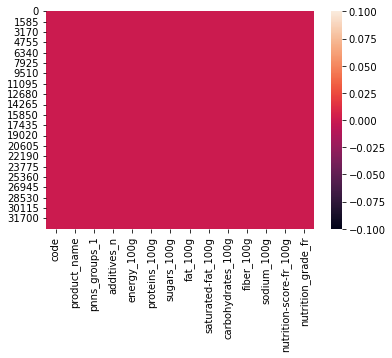

In [124]:
sns.heatmap(df_clean_median.isnull())

# Export du fichier nettoyé


In [125]:
df_clean_median.to_csv('en.openfoodfacts.org.products_cleaned2.csv', index=False)

Conclusion : voici notre base de données nettoyée selon les approximations les plus larges avec les variables les plus pertinentes. ce qui nous donne une base prête à l'exploration et l'analyse .